In [2]:
import inform_utils as inform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.lines as mlines

In [18]:
def load_nc_cldrgme(file_paths):
    
    combined_blocks = []   
    for path in file_paths:
        rf = path.split("/")[-1].split(".")[0]  # e.g., "RF01"
        ds = xr.open_dataset(path)
        
        # Get unique combinations
        labels = ds["block_label"].values
        indices = ds["block_index"].values
        
        # Convert to DataFrame for convenient filtering
        df = ds.to_dataframe().reset_index().drop(columns="index")  # remove redundant index
        
        # Get all unique (label, index) pairs
        unique_blocks = df[["block_label", "block_index"]].drop_duplicates()
        
        # Loop through each unique block
        for _, row in unique_blocks.iterrows():
            label = row["block_label"]
            idx = row["block_index"]
        
            # Filter DataFrame
            df_block = df[(df["block_label"] == label) & (df["block_index"] == idx)].copy()
        
            # (Optional) add flight ID if you have it
            df_block["block_label"] = label
            df_block["block_index"] = idx
        
            combined_blocks.append(df_block)
        all_blocks = pd.concat(combined_blocks, ignore_index=True)
    return all_blocks

In [16]:
# Path to your NetCDF files (adjust as needed)
file_paths = sorted(glob.glob("/glade/u/home/patnaude/inform/composited data/*SOCRATES*.nc"))
All_rf_df = load_nc_cldrgme(file_paths)

In [17]:
All_rf_df

,block_label,block_index,Time,GGLAT,GGLON,GGALT,ATX,DPXC,UIC,WIC,...,Tadv,RH700,EIS,cloud_regime,flight,DTHETAX_GP,DTHETAY_GP,DTHETAZ_GP,PLWC,CONCN_CFDC
0,Level BL,0,2018-01-16 02:24:47,-61.067547,154.024521,165.920715,0.601572,-0.815900,14.897609,-0.163902,...,0.000796,48.332634,7.401818,Open-Cell,RF01,NaN,NaN,NaN,NaN,NaN
1,Level BL,0,2018-01-16 02:24:48,-61.067616,154.022537,165.277405,0.526197,-0.866374,15.214920,-0.061424,...,0.000796,48.332634,7.401818,Open-Cell,RF01,NaN,NaN,NaN,NaN,NaN
2,Level BL,0,2018-01-16 02:24:49,-61.067688,154.020569,164.719696,0.526944,-1.057580,15.738605,-0.100057,...,0.000796,48.332634,7.401818,Open-Cell,RF01,NaN,NaN,NaN,NaN,NaN
3,Level BL,0,2018-01-16 02:24:50,-61.067760,154.018570,164.378784,0.547102,-0.995791,16.100796,-0.341300,...,0.000796,48.332634,7.401818,Open-Cell,RF01,NaN,NaN,NaN,NaN,NaN
4,Level BL,0,2018-01-16 02:24:51,-61.067833,154.016586,164.229446,0.627996,-0.869559,15.561852,-0.181333,...,0.000796,48.332634,7.401818,Open-Cell,RF01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320396,Out-of-cloud Level FT,6,2018-02-24 08:30:26,-43.132866,147.629562,1218.218628,5.507749,1.740330,16.398491,-0.146708,...,-0.000408,9.453697,1.184114,Open-Cell,RF15,NaN,NaN,NaN,NaN,NaN
320397,Out-of-cloud Level FT,6,2018-02-24 08:30:27,-43.131840,147.629898,1217.185547,5.747379,1.724050,17.047480,-0.412986,...,-0.000408,9.453697,1.184114,Open-Cell,RF15,NaN,NaN,NaN,NaN,NaN
320398,Out-of-cloud Level FT,6,2018-02-24 08:30:28,-43.130817,147.630234,1216.105713,5.849936,1.582860,17.558781,0.107436,...,-0.000408,9.453697,1.184114,Open-Cell,RF15,NaN,NaN,NaN,NaN,NaN
320399,Out-of-cloud Level FT,6,2018-02-24 08:30:29,-43.129795,147.630585,1215.422363,5.939861,1.628239,17.128401,0.343874,...,-0.000408,9.453697,1.184114,Open-Cell,RF15,NaN,NaN,NaN,NaN,NaN


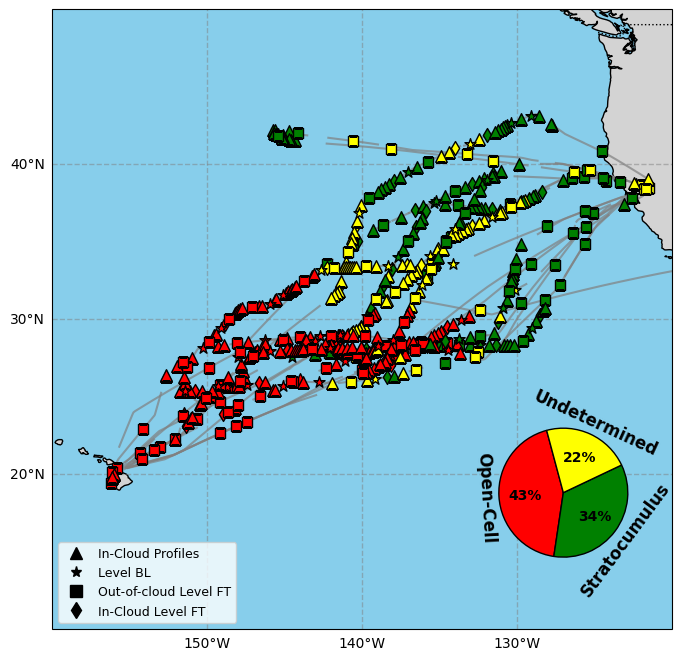

In [17]:
# Create a plot with Cartopy's PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8, 14))

# Add global map features
ax.add_feature(cfeature.LAND, edgecolor='black', color='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines()
# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Customize the labels
gl.top_labels = False   # Don't show labels on top
gl.right_labels = False # Don't show labels on the right
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# SOCRATES
# # Optional: use nicer tick spacing
# gl.xlocator = mticker.FixedLocator(range(130, 175, 10))
# gl.ylocator = mticker.FixedLocator(range(-65, -30, 10))
# ax.set_extent([133, 165, -68, -37], crs=ccrs.PlateCarree())

# CSET
# Optional: use nicer tick spacing
gl.xlocator = mticker.FixedLocator(range(-160, -120, 10))
gl.ylocator = mticker.FixedLocator(range(10, 60, 10))
ax.set_extent([-160, -120, 10, 50], crs=ccrs.PlateCarree())

marker_map = {
    "In-Cloud Profiles": "^",
    "Level BL": "*",
    "Out-of-cloud Level FT": "s",
    "In-Cloud Level FT": "d"
}
color_map = {
    "Undetermined": "yellow",
    "Stratocumulus": "green",
    "Open-Cell": "red"
}
size_map = {
    "In-Cloud Profiles": 70,
    "Level BL": 70,
    "Out-of-cloud Level FT": 50,
    "In-Cloud Level FT": 50
}
# Collect midpoints + regime mode
points = []

for (flight, label, idx), block in All_rf_df.groupby(["flight", "block_label", "block_index"]):
    block = block.sort_values("Time")
    
    # Midpoint time
    start_time = block["Time"].iloc[0]
    end_time = block["Time"].iloc[-1]
    mid_time = start_time + (end_time - start_time) / 2

    # Find the row closest to mid_time
    closest_idx = (block["Time"] - mid_time).abs().idxmin()
    mid_lat = block.loc[closest_idx, "GGLAT"]
    mid_lon = block.loc[closest_idx, "GGLON"]

    # Mode of cloud_regime
    if block["cloud_regime"].notna().any():
        mode = block["cloud_regime"].mode()
        cloud_type = mode.iloc[0] if not mode.empty else "Undetermined"
    else:
        cloud_type = "Undetermined"

    points.append({
        "lat": mid_lat,
        "lon": mid_lon,
        "regime": cloud_type,
        "block_label": label
    })
    # Plot the flight track of the current block
    ax.plot(block["GGLON"], block["GGLAT"],
        transform=ccrs.PlateCarree(),
        color='gray', linewidth=1.5, alpha=0.7)
    
# Create plotting DataFrame
df_plot = pd.DataFrame(points)

for _, row in df_plot.iterrows():
    ax.scatter(
        row["lon"], row["lat"],
        marker=marker_map.get(row["block_label"], "o"),
        color=color_map.get(row["regime"], "gray"),
        s=size_map.get(row["block_label"], 100),
        edgecolor="black",
        zorder=3,
        transform=ccrs.PlateCarree()
    )

ax.add_feature(cfeature.OCEAN, facecolor='skyblue')

# Count number of each regime
regime_counts = df_plot["regime"].value_counts()
regimes = regime_counts.index.tolist()
sizes = regime_counts.values

colors = [color_map.get(r, "gray") for r in regimes]

# Create the inset axes for pie chart (top right in axes coords)
# pie_ax = inset_axes(ax, width="20%", height="20%", loc="upper right")
pie_ax = inset_axes(
        ax,
        width="65%", height="40%",  # relative to bbox
        bbox_to_anchor=(0.5, -.3, 1, 0.65),  # (x0, y0, width, height)
        bbox_transform=ax.transAxes,
        loc='upper left',
        borderpad=0
        )
wedges, texts, autotexts = pie_ax.pie(
    sizes,
    labels=None,
    colors=colors,
    startangle=105,
    wedgeprops=dict(edgecolor='k'),
    textprops=dict(fontweight='bold'),
    autopct='%1.d%%'  # This adds percentage labels inside the wedges
)

total = sum(sizes)

for i, (wedge, regime, count) in enumerate(zip(wedges, regimes, sizes)):
    # Compute the angle at the center of the wedge
    theta = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(theta))
    y = np.sin(np.deg2rad(theta))

    # Adjust label position slightly outside the wedge
    r = 1.2  # Radius factor
    label_x = r * x
    label_y = r * y

    # Rotation: perpendicular (tangent) to the wedge angle
    rotation = theta if -90 <= theta <= 90 else theta + 180

    # Format: "Regime (xx.x%)"
    pct = count / total * 100
    label = f"{regime}"

    if regime != 'Undetermined':
        rotation += 180

    pie_ax.text(
        label_x, label_y,
        label,
        rotation=rotation + 90,
        rotation_mode='anchor',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        transform=pie_ax.transData,
        clip_on=False,
    )

# Create legend entries for each block_label (marker type)
legend_handles = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                  markersize=8, label=label)
    for label, marker in marker_map.items()
]

# Add the legend to the plot
ax.legend(handles=legend_handles, loc='lower left', fontsize=9)

# fig.savefig('

In [18]:
fig.savefig('CSET_flight_track_cloud_regime_pie_090925.png',dpi=400,bbox_inches='tight')

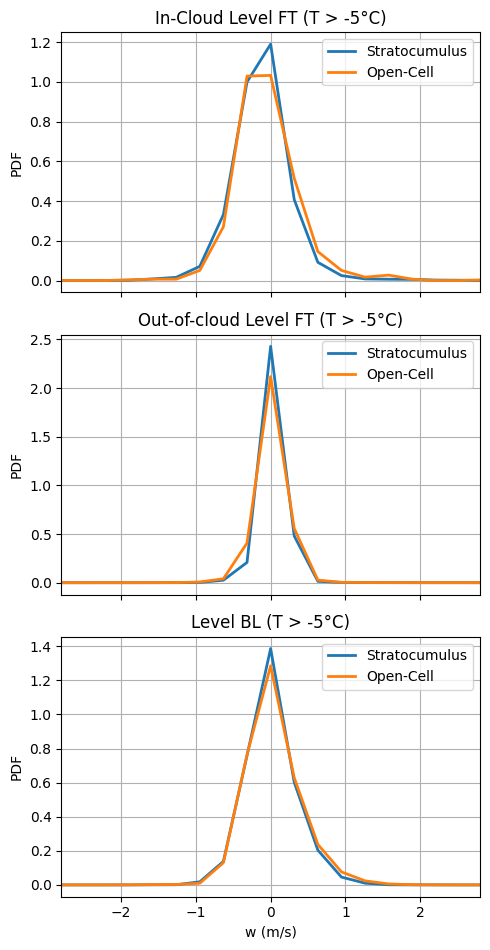

In [11]:
# Define bins and centers
w_bins = np.linspace(-3, 3, 20)
bin_centers = 0.5 * (w_bins[:-1] + w_bins[1:])

# Define regimes and labels
regimes_of_interest = ["Stratocumulus", "Open-Cell"]
labels_of_interest = ["In-Cloud Level FT", "Out-of-cloud Level FT", "Level BL"]

# Precompute PDFs
pdfs = {}

for label in labels_of_interest:
    for regime in regimes_of_interest:
        df_sub = All_rf_df[
            (All_rf_df['block_label'] == label) &
            (All_rf_df['cloud_regime'] == regime) & (All_rf_df['ATX'] > -5)
            ]
        if label == "In-Cloud Level FT":
            concd_col = next((col for col in df_sub.columns if 'CONCD' in col), None)
            plwc_col = next((col for col in df_sub.columns if 'PLWCD' in col), None) or \
                   next((col for col in df_sub.columns if 'PLWC' in col), None)
            df_sub = df_sub[(df_sub[concd_col] > 10) & (df_sub[plwc_col] > 0.001)]

        w_vals = df_sub['WIC'].dropna()
        counts, _ = np.histogram(w_vals, bins=w_bins, density=True)
        pdfs[(label, regime)] = counts

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10), sharex=True)

color_map = {
    "Stratocumulus": "tab:blue",
    "Open-Cell": "tab:orange"
}

for i, label in enumerate(labels_of_interest):
    ax = axes[i]
    for regime in regimes_of_interest:
        counts = pdfs[(label, regime)]
        ax.plot(
            bin_centers,
            counts,
            label=regime,
            color=color_map[regime],
            linewidth=2
        )
    ax.set_title(f"{label} (T > -5°C)", fontsize=12)
    ax.set_ylabel("PDF")
    ax.grid(True)
    ax.legend()
    ax.set_xlim(-2.8,2.8)

# Shared x-label
axes[-1].set_xlabel("w (m/s)")

# plt.suptitle("PDF of Vertical Velocity by Flight Type and Cloud Regime", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('PDF_w_by_flight_type_Cloud_regime_Tgm5_060225.png', dpi=300, bbox_inches='tight')
plt.show()


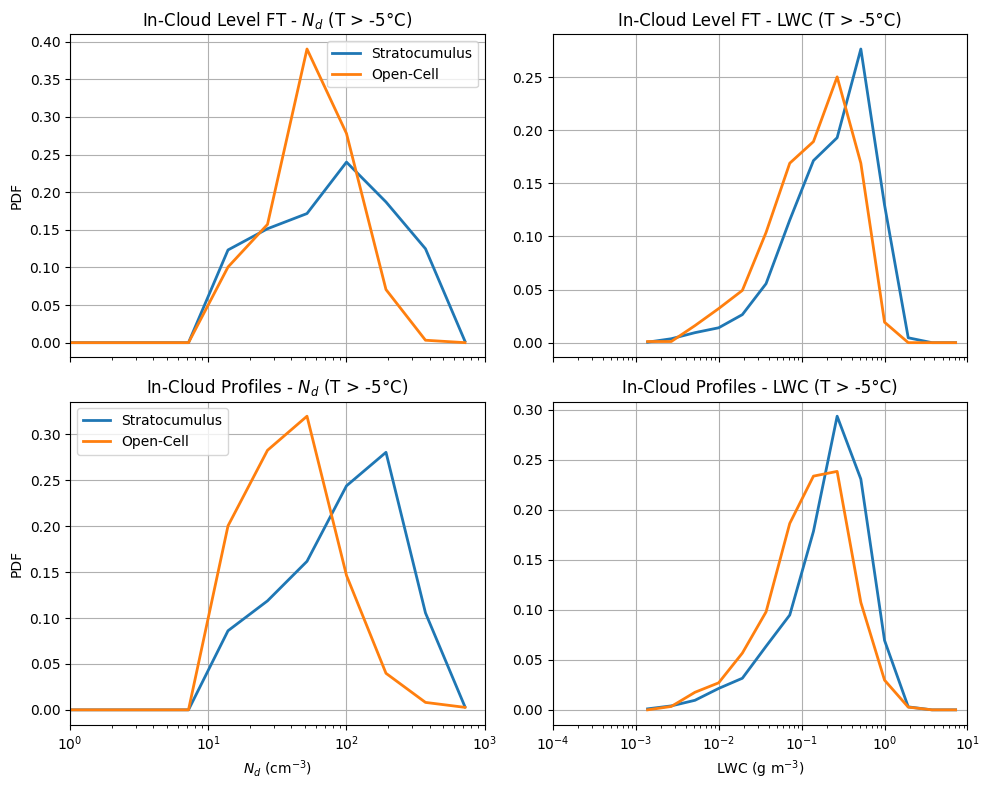

In [14]:
# Define bins and centers
Nd_bins = np.logspace(-1, 3, 15)
Nd_centers = np.sqrt(Nd_bins[:-1] * Nd_bins[1:])

LWC_bins = np.logspace(-3, 1, 21)
LWC_centers = np.sqrt(LWC_bins[:-1] * LWC_bins[1:])
Nd_bins = np.logspace(-1, 3, 15)
Nd_centers = np.sqrt(Nd_bins[:-1] * Nd_bins[1:])
Nd_binwidth = Nd_bins[1:]-Nd_bins[0:-1]

LWC_bins = np.logspace(-3, 1, 15)
LWC_centers = np.sqrt(LWC_bins[:-1] * LWC_bins[1:])
LWC_binwidth = LWC_bins[1:]-LWC_bins[0:-1]
# Define regimes and labels
regimes_of_interest = ["Stratocumulus", "Open-Cell"]
labels_of_interest = ["In-Cloud Level FT", "In-Cloud Profiles"]

# PDF dictionaries
nd_pdfs = {}
lwc_pdfs = {}

for label in labels_of_interest:
    for regime in regimes_of_interest:
        df_sub = All_rf_df[
            (All_rf_df['block_label'] == label) &
            (All_rf_df['cloud_regime'] == regime) & (All_rf_df['ATX'] > -5)
            ]
        concd_col = next((col for col in df_sub.columns if 'CONCD' in col), None)
        plwc_col = next((col for col in df_sub.columns if 'PLWCD' in col), None) or \
               next((col for col in df_sub.columns if 'PLWC' in col), None)
        df_sub = All_rf_df[
            (All_rf_df["block_label"] == label) &
            (All_rf_df["cloud_regime"] == regime) &
            (All_rf_df[concd_col] > 10) &
            (All_rf_df[plwc_col] > 0.001) &
            (All_rf_df["ATX"] > -5)
        ]

        # Nd PDF
        nd_vals = df_sub[concd_col].dropna()
        nd_counts, _ = np.histogram(nd_vals, bins=Nd_bins, density=True)
        nd_pdfs[(label, regime)] = nd_counts*Nd_binwidth

        # LWC PDF
        lwc_vals = df_sub[plwc_col].dropna()
        lwc_counts, _ = np.histogram(lwc_vals, bins=LWC_bins, density=True)
        lwc_pdfs[(label, regime)] = lwc_counts*LWC_binwidth

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex='col')

color_map = {
    "Stratocumulus": "tab:blue",
    "Open-Cell": "tab:orange"
}

for i, label in enumerate(labels_of_interest):
    # Left column: Nd
    ax_nd = axes[i, 0]
    for regime in regimes_of_interest:
        ax_nd.plot(Nd_centers, nd_pdfs[(label, regime)], label=regime,
                   color=color_map[regime], linewidth=2)
    ax_nd.set_title(f"{label} - $N_d$ (T > -5°C)")
    ax_nd.set_ylabel("PDF")
    ax_nd.set_xscale('log')
    ax_nd.set_xlim(1, 1000)
    ax_nd.grid(True)
    ax_nd.legend()

    # Right column: LWC
    ax_lwc = axes[i, 1]
    for regime in regimes_of_interest:
        ax_lwc.plot(LWC_centers, lwc_pdfs[(label, regime)], label=regime,
                    color=color_map[regime], linewidth=2)
    ax_lwc.set_title(f"{label} - LWC (T > -5°C)")
    ax_lwc.set_xscale('log')
    ax_lwc.set_xlim(.0001, 10)
    ax_lwc.grid(True)
    if i == 1:
        ax_lwc.set_xlabel(r"LWC (g m$^{-3}$)")

# Shared bottom x-axis labels
axes[1, 0].set_xlabel(r"$N_d$ (cm$^{-3}$)")

plt.tight_layout()
# plt.savefig('PDF_Nd_LWC_2x2_by_flight_type_cloudregime_060225.png', dpi=300, bbox_inches='tight')
plt.show()


No valid data for T > 20°C
No valid data for T > 20°C


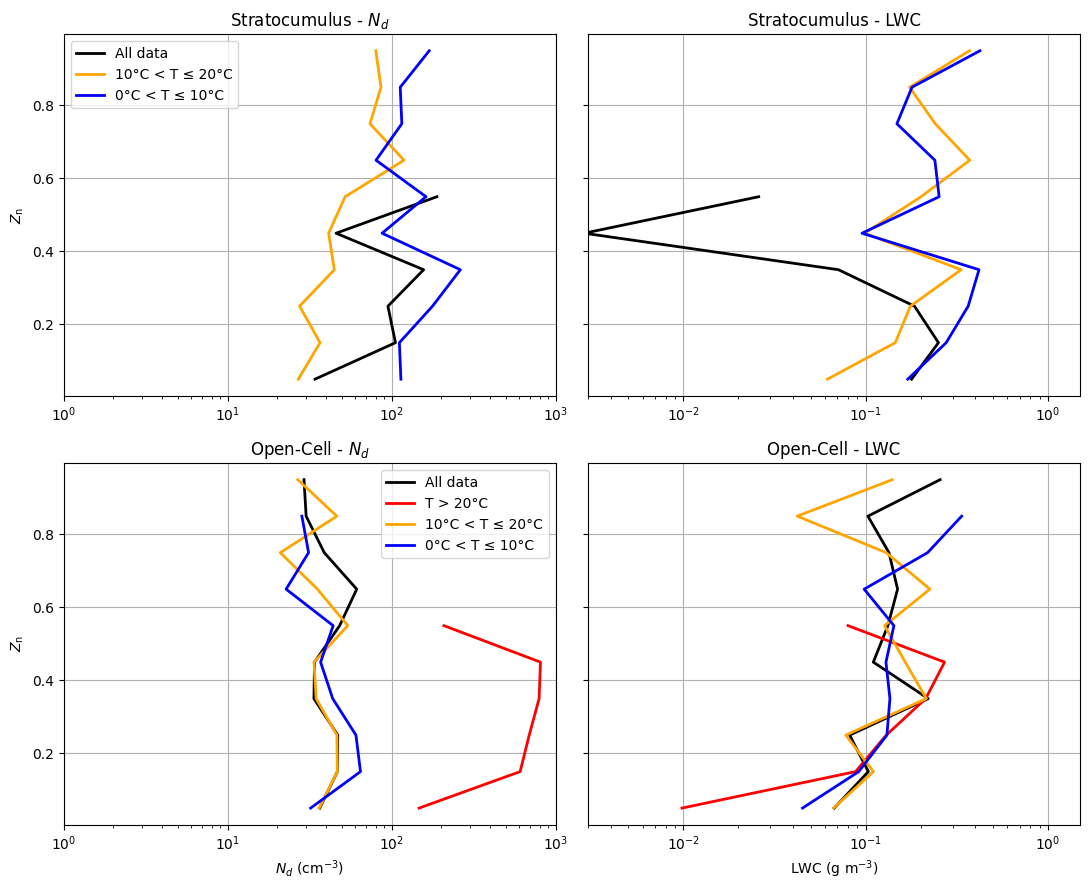

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot log10 vertical profiles
def plot_profile_from_df(ax, alt, var, label, color):
    var = np.where(var > 0, var, np.nan)
    log_var = np.log10(var)

    # Remove NaNs
    valid = ~np.isnan(log_var)
    log_var = log_var[valid]
    alt = alt[valid]

    if len(log_var) == 0:
        print(f"No valid data for {label}")
        return

    # Normalize height
    z_norm = (alt - alt.min()) / (alt.max() - alt.min())

    # Bin and group
    bins = np.linspace(0, 1, 11)
    bin_indices = np.digitize(z_norm, bins)
    df_binned = pd.DataFrame({"Z_n": z_norm, "log_val": log_var, "bin": bin_indices})
    df_binned = df_binned[df_binned["bin"] < len(bins)]

    grouped = df_binned.groupby("bin")["log_val"]
    mean = grouped.mean()
    std = grouped.std()
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = bin_centers[:len(mean)]

    # Plot
    ax.plot(10**mean, bin_centers, label=label, color=color, linewidth=2)
    # ax.fill_betweenx(bin_centers, 10**(mean - std), 10**(mean + std), color=color, alpha=0.3)


# Setup: cloud regimes, temp bins, base mask
cloud_regimes = ["Stratocumulus", "Open-Cell"]

# temp_bins = {
#     "All data": (All_rf_df["ATX"] > -10),
#     "T > 0°C": (All_rf_df["ATX"] > 0),
#     "-5°C < T ≤ 0°C": (All_rf_df["ATX"] > -5) & (All_rf_df["ATX"] <= 0),
#     "-10°C < T ≤ -5°C": (All_rf_df["ATX"] <= -5) & (All_rf_df["ATX"] > -10)
# }

temp_bins = {
    "All data": (All_rf_df["ATX"] > -20),
    "T > 20°C": (All_rf_df["ATX"] > 20),
    "10°C < T ≤ 20°C": (All_rf_df["ATX"] > 10) & (All_rf_df["ATX"] <= 20),
    "0°C < T ≤ 10°C": (All_rf_df["ATX"] > 0) & (All_rf_df["ATX"] <= 10)
}
colors = {
    "All data": "black",
    "T > 20°C": "red",
    "10°C < T ≤ 20°C": "orange",
    "0°C < T ≤ 10°C": "blue"
}

# Validity mask
concd_col = next((col for col in All_rf_df.columns if 'CONCD' in col), None)
plwc_col = next((col for col in All_rf_df.columns if 'PLWCD' in col), None) or \
       next((col for col in All_rf_df.columns if 'PLWC' in col), None)

base_mask = (
    ((All_rf_df["block_label"] == "In-Cloud Profiles") | (All_rf_df["block_label"] == "In-Cloud Level FT")) &
    (All_rf_df[concd_col] > 10) &
    (All_rf_df[plwc_col] > 0.001) 
    # (All_rf_df["PLWCC"] > 0)
)

# Create 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(11, 9), sharex=False, sharey=True)

for i, regime in enumerate(cloud_regimes):
    regime_mask = All_rf_df["cloud_regime"] == regime

    for temp_label, temp_mask in temp_bins.items():
        df_sub = All_rf_df[base_mask & regime_mask & temp_mask].copy()

        # Left column: Nd profile
        ax_nd = axes[i, 0]
        plot_profile_from_df(ax_nd,
                             df_sub["GGALT"].values,
                             df_sub[concd_col].values,
                             label=temp_label,
                             color=colors[temp_label])
        ax_nd.set_title(f"{regime} - $N_d$")
        ax_nd.set_ylabel(r'$Z_\text{n}$')
        ax_nd.grid(True)

        # Right column: LWC profile
        ax_lwc = axes[i, 1]
        plot_profile_from_df(ax_lwc,
                             df_sub["GGALT"].values,
                             df_sub[plwc_col].values,
                             label=temp_label,
                             color=colors[temp_label])
        ax_lwc.set_title(f"{regime} - LWC")
        ax_lwc.grid(True)

    axes[i, 0].legend()

# Set consistent x-limits for all subplots
for ax in axes[:, 0]:  # Left column (Nd)
    ax.set_xlim(1, 1000)  # Adjust as needed for log10(Nd)
    ax.set_xscale('log')

for ax in axes[:, 1]:  # Right column (LWC)
    ax.set_xlim(.003, 1.5)  # Adjust as needed for log10(LWC)
    ax.set_xscale('log')
    

# Final formatting
axes[1, 0].set_xlabel(r'$N_d$ (cm$^{-3}$)')
axes[1, 1].set_xlabel(r'LWC (g m$^{-3}$)')

plt.tight_layout()
# plt.savefig("Nd_LWC_profiles_by_regime_temp_060225.png", dpi=300, bbox_inches='tight')
plt.show()


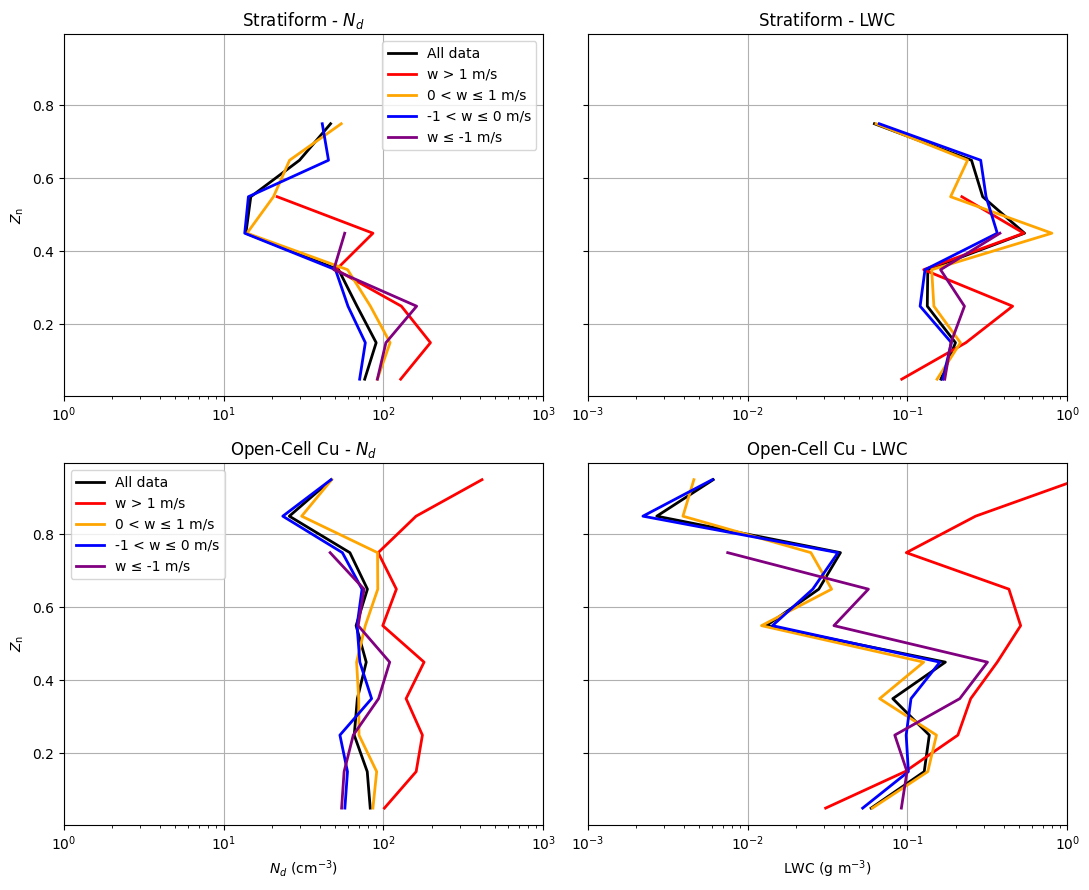

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot log10 vertical profiles
def plot_profile_from_df(ax, alt, var, label, color):
    var = np.where(var > 0, var, np.nan)
    log_var = np.log10(var)

    # Remove NaNs
    valid = ~np.isnan(log_var)
    log_var = log_var[valid]
    alt = alt[valid]

    if len(log_var) == 0:
        print(f"No valid data for {label}")
        return

    # Normalize height
    z_norm = (alt - alt.min()) / (alt.max() - alt.min())

    # Bin and group
    bins = np.linspace(0, 1, 11)
    bin_indices = np.digitize(z_norm, bins)
    df_binned = pd.DataFrame({"Z_n": z_norm, "log_val": log_var, "bin": bin_indices})
    df_binned = df_binned[df_binned["bin"] < len(bins)]

    grouped = df_binned.groupby("bin")["log_val"]
    mean = grouped.mean()
    std = grouped.std()
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = bin_centers[:len(mean)]

    # Plot
    ax.plot(10**mean, bin_centers, label=label, color=color, linewidth=2)
    # ax.fill_betweenx(bin_centers, mean - std, mean + std, color=color, alpha=0.3)


# Setup: cloud regimes, temp bins, base mask
cloud_regimes = ["Stratiform", "Open-Cell Cu"]

# Define vertical velocity bins
w_bins = {
    "All data": (All_rf_df["WIC"]),
    "w > 1 m/s": (All_rf_df["WIC"] > 1),
    "0 < w ≤ 1 m/s": (All_rf_df["WIC"] > 0) & (All_rf_df["WIC"] <= 1),
    "-1 < w ≤ 0 m/s": (All_rf_df["WIC"] > -1) & (All_rf_df["WIC"] <= 0),
    "w ≤ -1 m/s": (All_rf_df["WIC"] <= -1)
}

# Color map for w bins
colors = {
    "All data": "black",
    "w > 1 m/s": "red",
    "0 < w ≤ 1 m/s": "orange",
    "-1 < w ≤ 0 m/s": "blue",
    "w ≤ -1 m/s": "purple"
}

# Validity mask
base_mask = (
    ((All_rf_df["block_label"] == "In-Cloud Profiles") | (All_rf_df["block_label"] == "In-Cloud Level FT")) &
    (All_rf_df["CONCD_RWIO"] > 10) &
    (All_rf_df["PLWCD_RWIO"] > 0.001) &
    (All_rf_df["PLWCC"] > 0)
)

# Create 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(11, 9), sharex=False, sharey=True)

for i, regime in enumerate(cloud_regimes):
    regime_mask = All_rf_df["cloud_regime"] == regime

    for w_label, temp_mask in w_bins.items():
        df_sub = All_rf_df[base_mask & regime_mask & temp_mask].copy()

        # Left column: Nd profile
        ax_nd = axes[i, 0]
        plot_profile_from_df(ax_nd,
                             df_sub["GGALT"].values,
                             df_sub["CONCD_RWIO"].values,
                             label=w_label,
                             color=colors[w_label])
        ax_nd.set_title(f"{regime} - $N_d$")
        ax_nd.set_ylabel(r'$Z_\text{n}$')
        ax_nd.grid(True)

        # Right column: LWC profile
        ax_lwc = axes[i, 1]
        plot_profile_from_df(ax_lwc,
                             df_sub["GGALT"].values,
                             df_sub["PLWCC"].values,
                             label=w_label,
                             color=colors[w_label])
        ax_lwc.set_title(f"{regime} - LWC")
        ax_lwc.grid(True)

    axes[i, 0].legend()

# Set consistent x-limits for all subplots
for ax in axes[:, 0]:  # Left column (Nd)
    ax.set_xlim(1, 1000)  # Adjust as needed for log10(Nd)
    ax.set_xscale('log')

for ax in axes[:, 1]:  # Right column (LWC)
    ax.set_xlim(.001, 1)  # Adjust as needed for log10(LWC)
    ax.set_xscale('log')
    
# Final formatting
axes[1, 0].set_xlabel(r'$N_d$ (cm$^{-3}$)')
axes[1, 1].set_xlabel(r'LWC (g m$^{-3}$)')

plt.tight_layout()
plt.savefig("Nd_LWC_profiles_by_regime_w_060225.png", dpi=300, bbox_inches='tight')
plt.show()


In [32]:
def plot_joint_pdf(All_rfs_df, xvar='M', yvar='ws'):
    import numpy as np
    import matplotlib.pyplot as plt
    from datetime import time

    # Map variable keys to their column names
    var_map = {
        'M': 'M',
        'ws': 'Wind_sp',
        'wd': 'Wind_dir',
        'dt': 'deltaT',
        'sst': 'ERA5_SST',
        'omega500': 'w500',
        'wshear': 'Wind_shear'
    }

    # Bin definitions
    bins = {
        'M': np.linspace(-30, 5, 36),
        'ws': np.linspace(0, 20, 21),
        'wd': np.linspace(0, 360, 25),
        'dt': np.linspace(-8, 4, 13),
        'sst': np.linspace(270, 300, 16),
        'omega500': np.linspace(-1.5, 1.5, 16),
        'wshear': np.linspace(0, 12, 13)
    }

    if xvar not in var_map or yvar not in var_map:
        raise ValueError(f"xvar and yvar must be among: {list(var_map.keys())}")

    # Ensure datetime format
    All_rfs_df['Time'] = pd.to_datetime(All_rfs_df['Time'])

    # Use existing 'cloud_regime' column for grouping
    group_data = {}
    regimes = All_rfs_df['cloud_regime'].dropna().unique()

    for regime in regimes:
        regime_df = All_rfs_df[All_rfs_df['cloud_regime'] == regime]
        x_vals = regime_df[var_map[xvar]].values
        y_vals = regime_df[var_map[yvar]].values
        mask = ~np.isnan(x_vals) & ~np.isnan(y_vals)
        group_data[regime] = {
            'x': [x_vals[mask]],
            'y': [y_vals[mask]]
        }

    # Plotting
    n_groups = len(group_data)
    fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 5), sharex=True, sharey=True)

    if n_groups == 1:
        axes = [axes]

    for ax, (label, data) in zip(axes, group_data.items()):
        x = np.concatenate(data['x'])
        y = np.concatenate(data['y'])

        H, xedges, yedges = np.histogram2d(x, y, bins=[bins[xvar], bins[yvar]])
        H = H / H.sum()
        H = np.ma.masked_where(H == 0, H)

        pcm = ax.pcolormesh(xedges, yedges, H.T, cmap='YlGnBu_r', vmin=0, vmax=0.2)
        ax.set_title(label)
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        fig.colorbar(pcm, ax=ax, label='Occurrence Frequency')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        ax.minorticks_on()

        x_mid = 0.5 * (xedges[0] + xedges[-1])
        y_mid = 0.5 * (yedges[0] + yedges[-1])
        ax.axhline(y=y_mid, color='red', linestyle='--', linewidth=1)
        ax.axvline(x=x_mid, color='red', linestyle='--', linewidth=1)

    plt.tight_layout()
    plt.show()


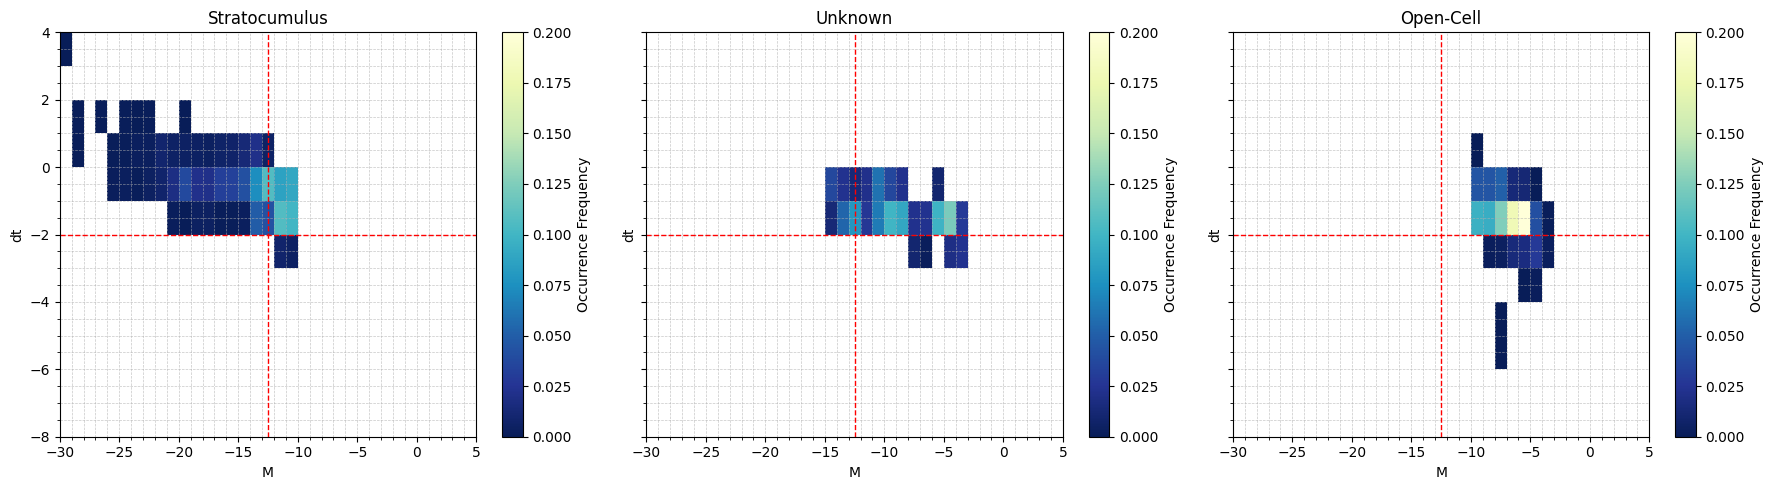

In [33]:
plot_joint_pdf(All_rf_df,xvar='M', yvar='dt')